# User Stories

Here, I will implement four user stories using the GarrettLib basic machine learning library.

In [2]:
# Import all external libraries used
import pandas as pd
import numpy as np
from sklearn import datasets
import sys
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Import the library and necessary classes
import sys
sys.path.append("../garrett_lib/")
from KMeans import KMeans
from TrainTestSplit import TrainTestSplit
from LogisticRegression import LogisticRegression
from ComputeAccuracy import ComputeAccuracy
from PCA import PCA
from mpl_toolkits.mplot3d import Axes3D
from LinearRegression import LinearRegression
from LinearClassification import LinearClassification
from KNeighborsRegression import KNeighborsRegression

1.  As   a   user   with   an   unlabeled   data   set,   I   want   to   see   what   points   cluster   together   so   that   I   can draw   conclusions   on   their   similarity.

2.  As   a   user   with   data   that   has   continuous,   real   valued   features   and   label,   I   want   to   a   model   of   this data   so   that   I   can   predict   the   label   given   new   data   points.

3.  As   a   user   with   continuous   features   and   labeled   categorical   data,   I   want   to   build   a   model   so   that   I can   predict   the   category   of   unlabeled   data.

4.  As   a   user   with   a   large,   noisy   data   set   with   more   or   equal   features   than   data   points,   I   want   a   data set   with   fewer   features   that   represents   the   original   data   set   so   that   I   can   build   models   with   the smaller   data   set   that   are   more   accuracy   and   less   noisy.


## User story #1: Clustering on Iris Data

Given a dataset of 4 physical attributes of 150 iris flowers, cluster them into meaningful groups.

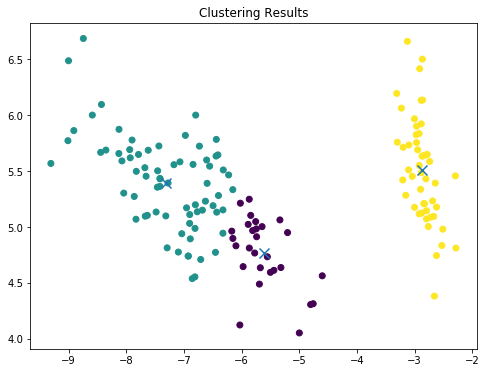

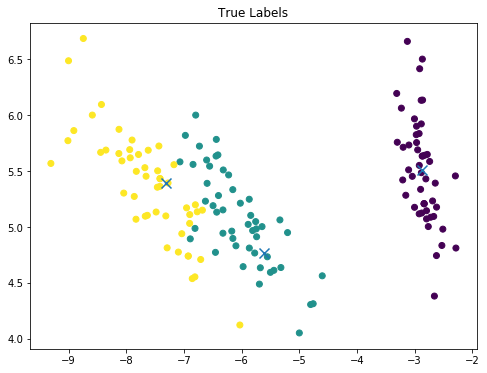

In [3]:
# Get the dataset from scikit-learn's downloaded data sets
X = pd.DataFrame(datasets.load_iris().data)

# Create a "KMeans" object based on the iris dataset
km  = KMeans(X)

# Split the iris dataset into 3 clusters
labels, centers = km.convert(3)

# Use PCA to convert the 4 physical attributes of the flowers to 2 dimensions (so they can be plotted)
pca = PCA(X)
pca.train(2)
temp = pca.convert(X)
centers = pd.DataFrame(pca.convert(centers.drop(["k_labels"], axis=1)))

# Plot the results of the clustering, colored by cluster label
plt.figure(figsize=(8,6))
plt.scatter(temp[0], temp[1], c=labels)
plt.scatter(centers[0], centers[1], marker='x', s=100)
plt.title("Clustering Results")
plt.show()

# Plot the results colored by the TRUE LABELS
# NOTE: This specific data set has 3 class labels. 
#   These class labels were unknown by the k-Means algorithm.
#   Each label is a specific species of Iris flower
plt.figure(figsize=(8,6))
plt.scatter(temp[0], temp[1], c=datasets.load_iris().target)
plt.scatter(centers[0], centers[1], marker='x', s=100)
plt.title("True Labels")
plt.show()

The clustering algorithm found 3 clusters that were similar to the species that us humans have decided are our clusters of iris flowers...

# User Story #2: User regression on the Boston House Price dataset

Given a dataset of continous features about houses, predict the home's final sale price.

In [42]:
# Get the dataset from scikit-learn's downloaded data sets
boston_set = datasets.load_boston()
X = pd.DataFrame(boston_set.data)
y = pd.DataFrame(boston_set.target)

# Split the data into train and test sets
# NOTE: a train-test split is used in this way:
# 1. The training data and training labels are used to create a model of house prices
# 2. The test data is input into the model and the model spits out it's estimations of house prices
# 3. We compare the results of what the model spits out to what we know the test data's actual house prices was
# 4. We do this for multiple models and choose the one the seems to preform the best
train_x, train_y, test_x, test_y = TrainTestSplit().split(X,y)

# Center and scale the data...
test_x = (test_x - train_x.mean()) / train_x.std()
train_x = (train_x - train_x.mean()) / train_x.std()

# Create the model
knn = KNeighborsRegression(train_x)
knn.train(train_y)

# Make the predictions on the test set
pred_y = knn.test(test_x,3)

# Compare model's predictions to the true sale prices
temp = pd.concat([pred_y, test_y],axis=1)
temp.columns = ["Model Results", "True Sale Price"]
temp

Model Results  True Sale Price
6        20.100000             22.9
7        16.033333             27.1
9        17.233333             18.9
11       18.533333             18.9
12       20.966667             21.7
13       18.933333             20.4
14       18.500000             18.2
16       20.633333             23.1
22       15.866667             15.2
27       16.000000             14.8
29       21.833333             21.0
31       17.266667             14.5
32       13.400000             13.2
33       13.600000             13.1
34       13.400000             13.5
36       19.866667             20.0
37       21.366667             21.0
39       33.366667             30.8
55       30.533333             35.4
56       22.166667             24.7
58       23.400000             23.3
60       19.733333             18.7
61       19.466667             16.0
63       22.666667             25.0
64       28.333333             33.0
67       21.733333             22.0
69       19.966667             20.9
71       23.466667             21.7
80       23.800000             28.0
81       24.433333             23.9
..             ...              ...
406       9.833333             11.9
410       8.900000             15.0
411      14.266667             17.2
413      13.866667             16.3
415       8.466667              7.2
416      12.333333              7.5
417      11.533333             10.4
419      13.900000              8.4
420      14.133333             16.7
424      14.200000             11.7
428      14.066667             11.0
429      12.866667              9.5
431      18.966667             14.1
436      13.333333              9.6
443      14.566667             15.4
446      14.133333             14.9
447      16.533333             12.6
455      14.200000             14.1
457      15.533333             13.5
458      14.533333             14.9
462      17.933333             19.5
463      20.900000             20.2
467      14.766667             19.1
473      23.200000             29.8
476      16.166667             16.7
478      16.433333             14.6
481      23.733333             23.7
490      12.200000              8.1
497      19.933333             18.3
499      19.933333             17.5

[170 rows x 2 columns]

# User Story #3: Use classification on the Iris Flower dataset

Given a dataset of continous features about flowers, predict a flower's new species

In [54]:
# Get the iris dataset and make it a binary classification problem (is species 'A' or not 'A')
X = pd.DataFrame(datasets.load_iris().data)
y = pd.DataFrame(datasets.load_iris().target)
y = pd.DataFrame(y[0].map(lambda x: -1 if x==0 else 1))

# Split into train & test sets
train_x, train_y, test_x, test_y = TrainTestSplit().split(X,y)

# Create the model
lc = LinearClassification(train_x)
lc.train(train_y)

# Predict the labels of the test set & get the accuracy (out of 50 points)
pred_y = lc.test(test_x)
ca = ComputeAccuracy(pred_y[0], test_y[0])
print "Accuracy of model: %" + str(ca.getAccuracy("classification")*100)

Accuracy of model: %98.0392156863


# User Story #4: User PCA & Regression on the Boston Housing Price dataset.

Given a 13-feature dataset, create 3 features from that data set and use kNN to predict the house price more efficiently and accurately.

In [58]:
# Get the dataset from scikit-learn's downloaded data sets
boston_set = datasets.load_boston()
X = pd.DataFrame(boston_set.data)
y = pd.DataFrame(boston_set.target)

# Split the data into train and test sets
# NOTE: a train-test split is used in this way:
# 1. The training data and training labels are used to create a model of house prices
# 2. The test data is input into the model and the model spits out it's estimations of house prices
# 3. We compare the results of what the model spits out to what we know the test data's actual house prices was
# 4. We do this for multiple models and choose the one the seems to preform the best
train_x, train_y, test_x, test_y = TrainTestSplit().split(X,y)

# Center and scale the data...
test_x = (test_x - train_x.mean()) / train_x.std()
train_x = (train_x - train_x.mean()) / train_x.std()

# Run Principal Component Analysis to reduce the number of features
pca = PCA(train_x)
pca.train()
train_x = pca.convert(train_x)
test_x = pca.convert(test_x)

# Create the model
knn = KNeighborsRegression(train_x)
knn.train(train_y)

# Make the predictions on the test set
pred_y = knn.test(test_x,3)

# Compare model's predictions to the true sale prices
temp = pd.concat([pred_y, test_y],axis=1)
temp.columns = ["Model Results", "True Sale Price"]
temp

Model Results  True Sale Price
2        30.200000             34.7
4        32.466667             36.2
5        27.033333             28.7
7        20.066667             27.1
11       22.500000             18.9
15       20.866667             19.9
17       18.500000             17.5
23       17.633333             14.5
35       22.966667             18.9
36       21.633333             20.0
41       32.233333             26.6
43       23.533333             24.7
44       23.866667             21.2
50       23.233333             19.7
52       31.133333             25.0
53       23.700000             23.4
55       33.133333             35.4
58       24.966667             23.3
61       20.366667             16.0
63       21.200000             25.0
64       33.333333             33.0
65       24.333333             23.5
69       21.333333             20.9
71       19.200000             21.7
74       20.500000             24.1
78       20.866667             21.2
79       21.000000             20.3
81       24.266667             23.9
82       23.000000             24.8
86       22.233333             22.5
..             ...              ...
426      14.733333             10.2
427      11.733333             10.9
428      12.700000             11.0
434      11.400000             11.7
435      11.100000             13.4
437       8.833333              8.7
438       9.933333              8.4
439      10.800000             12.8
441      12.166667             17.1
442      13.600000             18.4
444      11.100000             10.8
446      14.033333             14.9
449      13.133333             13.0
452      17.200000             16.1
454      12.700000             14.9
459      18.900000             20.0
460      14.166667             16.4
472      19.533333             23.2
473      19.533333             29.8
476      19.933333             16.7
481      21.266667             23.7
482      19.133333             25.0
483      21.600000             21.8
487      21.600000             20.6
493      16.466667             21.8
495      15.266667             23.1
497      19.966667             18.3
498      19.733333             21.2
499      19.766667             17.5
505      20.400000             11.9

[170 rows x 2 columns]